<a href="https://colab.research.google.com/github/Seongwoong-sk/PyTorch-Deep-Learning-Zero-To-All/blob/main/Fashion_MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='green'>Deep Neural Network: FashoinMNIST Classifier</font>

<img src="http://drive.google.com/uc?export=view&id=1OSa44ql8zf9kq2r_D_Q0U1WWTkMPcCgm" width="600px" height="500px" />

* 이미지 출처: 네이버
<br>


**개요**
- 스마트 렌즈는 여러분이 찍은 이미지가 어떤 옷인지 판별하고 쇼핑과 연결지어 검색까지 해줍니다. 이러한 기술은 어떻게 만들어 지는 것일까요? 물론 복잡한 기술이 들어가겠지만 여기에는 딥러닝 기술이 포함되어 있습니다. 
- 이번 프로젝트에서는 10 종류의 의류와 관련된 이미지를 학습시키고 판별하는 모델을 만들어 볼것입니다.     

**목표**
- [Fashion-Mnist](https://github.com/zalandoresearch/fashion-mnist) 데이터셋을 활용해 분류기를 학습한다.
- Multi layer perceptron, Batch normalization, ReLU 를 활용해 네트워크를 설계한다.

**설명**

- 우리가 다뤄야 할 데이터는 1x28x28 (채널x이미지 높이x이미지 너비)의 흑백 이미지입니다. 즉, 밝기값만을 가지고 있습니다.
    - 생활속에서 주로 접하게되는 컬러 이미지의 경우 빛의 3원색인 Red, Green, Blue의 3채널로 구성되어 있습니다. 일반적으로 이 3채널을 RGB채널이라고 부르며, 이 채널 값들의 조합으로 색상을 표현하게 됩니다.
- DNN(Deep Neural Network)의 입력으로 사용되기 위해서 1X28X28의 3차원 은 784의 1차원 데이터로(1\*28\*28=784) 변환됩니다. 
- 784차원의 입력 데이터는 DNN을 통과하여 10차원의 의류 종류를 나타내는 출력으로 변환됩니다.

**데이터셋**    
[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)
  - MNIST와 동일한 크기의 데이터(10개의 부류, 60,000개의 학습, 10,000개의 테스트 데이터)이지만 MNIST보다 분류하기 어려운 의류 영상데이터 입니다. 
  - Fashion-MNIST의 데이터 부류는 T-Shirts, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Bag, Ankle boot로 10개의 클래스로 이루어져 있습니다.

<img src="http://drive.google.com/uc?export=view&id=1N691obHfLeKvP7eJ842EkMovK0O_Nu5E" width="800px" height="300px"/>
<caption><center>&lt;1$\times$28$\times$28 의 이미지를 입력으로 받아 옷의 종류를 반환하는 DNN&gt;</center></caption>

# <font color='green'>PROCESS</font>
1. Pacakge load
2. Hyperparameter Setting
3. Dataset 및 DataLoader 할당
4. 데이터 샘플 시각화
5. 네트워크 설계
6. Weight initialization
7. 모델 생성
8. Loss function 및 Optimizer 정의
9. Training
10. Test

In [ ]:
# from google.colab import auth
# auth.authenticate_user()

# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
from pathlib import Path

folder = "Project/"
project_dir = "DNN_PT"

base_path = Path("/content/drive/MyDrive/")
project_path = base_path / folder / project_dir
os.chdir(project_path)

for x in list(project_path.glob("*")):
    if x.is_dir():
        dir_name = str(x.relative_to(project_path))
        os.rename(dir_name, dir_name.split(" ",1)[0])
print(f"현재 디렉토리 위치: {os.getcwd()}")

현재 디렉토리 위치: /content/drive/MyDrive/Project/DNN_PT


In [3]:
import torch 
print('pytorch version: {}'.format(torch.__version__))

pytorch version: 1.9.0+cu102


## 1. Package load


In [4]:
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print('pytorch version: {}'.format(torch.__version__))
print('GPU 사용 가능 여부: {}'.format(torch.cuda.is_available()))

torch.manual_seed(777)
device = "cuda" if torch.cuda.is_available() else "cpu"   # GPU 사용 가능 여부에 따라 device 정보 저장
if device == 'cuda':
    torch.cuda.manual_seed_all(777)


pytorch version: 1.9.0+cu102
GPU 사용 가능 여부: True


## 2. 하이퍼파라미터 세팅

In [5]:
batch_size = 100
num_epochs = 20
learning_rate = 0.001

## 3. Dataset 및 DataLoader 할당


In [6]:
from torch.utils.data import DataLoader

root = '/content/drive/MyDrive/Project/DNN_PT'


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])

train_data = dset.FashionMNIST(root=root, train=True, transform=transform, download=True)
test_data = dset.FashionMNIST(root=root, train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Project/DNN_PT/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/Project/DNN_PT/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Project/DNN_PT/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/Project/DNN_PT/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Project/DNN_PT/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/Project/DNN_PT/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Project/DNN_PT/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/Project/DNN_PT/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## 4. 데이터 샘플 시각화



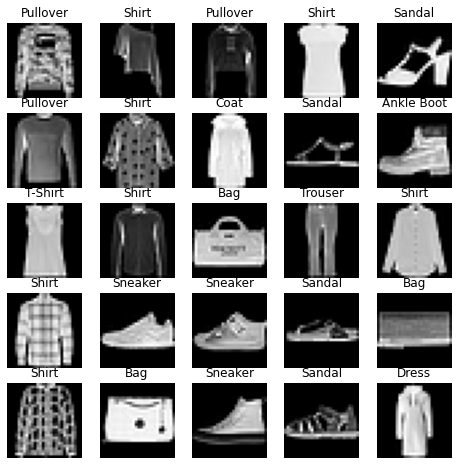

In [7]:
# 클래스의 이름과 인덱스를 딕셔너리로 저장
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}
              
columns = 5
rows = 5
fig = plt.figure(figsize=(8,8))

for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(train_data))
    img = train_data[data_idx][0][0,:,:].numpy() # numpy()를 통해 torch Tensor를 numpy array로 변환
    label = labels_map[train_data[data_idx][1]] # item()을 통해 torch Tensor를 숫자로 변환
    
    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

## 5. 네트워크 설계
<img src="http://drive.google.com/uc?export=view&id=1KuQg548RFXMm1Kih46IXkKLO-q76lBdQ" width="800px" height="400px" />






In [33]:
class DNN(nn.Module):
    def __init__(self, num_classes=10):
        super(DNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(28*28,512),    # Linear_1 해당하는 층
            nn.BatchNorm1d(512),    # BatchNorm_1 해당하는 층
            nn.ReLU()     # ReLU_1 해당하는 층
        )

        self.layer2 =nn.Sequential(
            nn.Linear(512,256),
            nn.BatchNorm1d(256),
            nn.ReLU()
        )

        self.layer3 = nn.Sequential(

            nn.Linear(256,10)    # Linear_3 해당하는 층 
        )
    
    def forward(self, x):
        x = x.view(x.size(0), -1) # flatten
        x_out = self.layer1(x)
        x_out = self.layer2(x_out)
        x_out = self.layer3(x_out)
        return x_out

## 6. Weight initialization


In [34]:
def weights_init(m):
    if isinstance(m, nn.Linear): # 모델의 모든 MLP 레이어에 대해서
        nn.init.xavier_normal_(m.weight) # Weight를 xavier_normal로 초기화
        print(m.weight)

## 7. 모델 생성

[model.apply()](https://pytorch.org/docs/stable/nn.html?highlight=apply#torch.nn.Module.apply)을 통해 가중치 초기화를 적용할 수 있습니다. apply 함수의 인자로 **<6. Weight initialization>** 에서 정의한 `weights_init` 함수를 주면 됩니다.

In [35]:
torch.manual_seed(777) # 일관된 weight initialization을 위한 random seed 설정
model = DNN().to(device)
model.apply(weights_init) # 모델에 weight_init 함수를 적용하여 weight를 초기화

Parameter containing:
tensor([[-0.0507,  0.0154, -0.0074,  ..., -0.0064, -0.0129,  0.0220],
        [-0.0658, -0.0096,  0.0362,  ...,  0.0376,  0.0242, -0.0166],
        [ 0.0096,  0.0582, -0.0821,  ...,  0.0047,  0.0395, -0.0147],
        ...,
        [-0.0314, -0.0140, -0.0258,  ...,  0.0033, -0.0451,  0.0408],
        [ 0.0020,  0.0297, -0.0689,  ..., -0.0444, -0.0145,  0.0079],
        [-0.0121,  0.0778,  0.0086,  ...,  0.0002,  0.0608,  0.0590]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0228, -0.0566, -0.0998,  ...,  0.0131,  0.0035,  0.0295],
        [-0.0053, -0.0027,  0.1046,  ..., -0.0805, -0.0348,  0.0048],
        [ 0.0008, -0.0065, -0.0037,  ..., -0.0145, -0.0438,  0.0085],
        ...,
        [ 0.0391, -0.0937, -0.0416,  ...,  0.0830,  0.0436,  0.0210],
        [-0.0278, -0.0063, -0.0160,  ...,  0.0841, -0.0332, -0.0588],
        [-0.0572,  0.0324, -0.0749,  ...,  0.0208, -0.0046,  0.0061]],
       device='cuda:0', requires_grad=True)


DNN(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
)

## 8. Loss function 및 Optimizer 정의

In [36]:
criterion = nn.CrossEntropyLoss() # softmax internally computed
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

## 9. Training

In [37]:
for epoch in range(num_epochs):

    for i, (imgs, labels) in enumerate(train_loader):

        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)  
        loss = criterion(outputs, labels)     
        
        optimizer.zero_grad()            # Clear gradients
        loss.backward()            # Gradients 기울기 계산
        optimizer.step()            # Parameters 업데이트
        
        _, argmax = torch.max(outputs, 1)
        accuracy = (labels == argmax).float().mean()
        
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'.format(
                epoch+1, num_epochs, i+1, len(train_loader), loss.item(), accuracy.item() * 100))

Epoch [1/20], Step [100/600], Loss: 0.4717, Accuracy: 79.00%
Epoch [1/20], Step [200/600], Loss: 0.5032, Accuracy: 82.00%
Epoch [1/20], Step [300/600], Loss: 0.3777, Accuracy: 83.00%
Epoch [1/20], Step [400/600], Loss: 0.4622, Accuracy: 85.00%
Epoch [1/20], Step [500/600], Loss: 0.3481, Accuracy: 90.00%
Epoch [1/20], Step [600/600], Loss: 0.3316, Accuracy: 88.00%
Epoch [2/20], Step [100/600], Loss: 0.3082, Accuracy: 87.00%
Epoch [2/20], Step [200/600], Loss: 0.2934, Accuracy: 88.00%
Epoch [2/20], Step [300/600], Loss: 0.4339, Accuracy: 84.00%
Epoch [2/20], Step [400/600], Loss: 0.3849, Accuracy: 85.00%
Epoch [2/20], Step [500/600], Loss: 0.3778, Accuracy: 83.00%
Epoch [2/20], Step [600/600], Loss: 0.3754, Accuracy: 85.00%
Epoch [3/20], Step [100/600], Loss: 0.1686, Accuracy: 95.00%
Epoch [3/20], Step [200/600], Loss: 0.2814, Accuracy: 92.00%
Epoch [3/20], Step [300/600], Loss: 0.2689, Accuracy: 90.00%
Epoch [3/20], Step [400/600], Loss: 0.3121, Accuracy: 89.00%
Epoch [3/20], Step [500/

In [38]:
model.eval() # Batch Normalization 할 때 사용

with torch.no_grad():
    correct = 0
    total = 0

    for i, (imgs, labels) in enumerate(test_loader):

        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, argmax = torch.max(outputs, 1) # max()를 통해 최종 출력이 가장 높은 class 선택
        total += imgs.size(0) # batch_size : 100
        correct += (labels == argmax).sum().item() # batch_size 중 맞는 것 계속 +=
    
    print('Test accuracy for {} images: {:.2f}%'.format(total, correct / total * 100))

Test accuracy for 10000 images: 89.63%


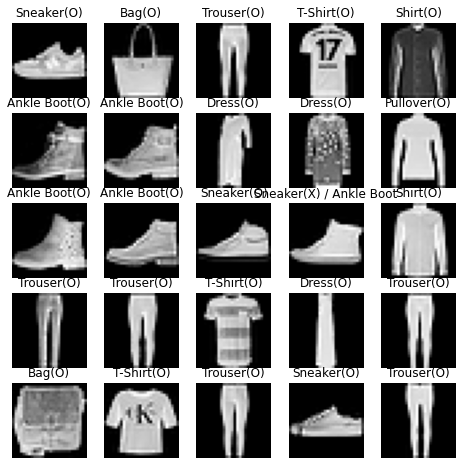

In [39]:
columns = 5
rows = 5
fig = plt.figure(figsize=(8,8))

model.eval()

for i in range(1, columns*rows+1):
    
    data_idx = np.random.randint(len(test_data))
    input_img = test_data[data_idx][0].unsqueeze(dim=0).to(device) 
    '''
    unsqueeze()를 통해 입력 이미지의 shape을 (1, 28, 28)에서 (1, 1, 28, 28)로 변환. 
    모델에 들어가는 입력 이미지의 shape은 (batch_size, channel, width, height) 되어야 함에 주의!
    '''
    output = model(input_img)
    _, argmax = torch.max(output, 1)
    pred = labels_map[argmax.item()]
    label = labels_map[test_data[data_idx][1]]
    
    fig.add_subplot(rows, columns, i)
    if pred == label:
        plt.title(pred + '(O)')
    else:
        plt.title(pred + '(X)' + ' / ' + label)
    plot_img = test_data[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap='gray')
    plt.axis('off')
model.train()
plt.show()

---